<a href="https://colab.research.google.com/github/Oleksii-Adamov/university-models-of-intelligent-systems/blob/main/MIS_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# difference

# Load datset from Google drive


In [ ]:
try:
  from google.colab import drive
  import os
  drive.mount('/content/drive')
  data_dir = 'drive/My Drive/MIS'
  os.makedirs(data_dir, exist_ok=True)
except ImportError:
  data_dir = '.'

Mounted at /content/drive


In [ ]:
weather_history_df = pd.read_csv(data_dir + '/weatherHistory.csv')

# Take a Quick Look at the Data Structure

In [ ]:
weather_history_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
weather_history_df["Formatted Date"] = weather_history_df["Formatted Date"].str[0:len('YYYY-mm-dd HH:MM:SS')]
weather_history_df["Date"] = pd.to_datetime(weather_history_df["Formatted Date"], format='%Y-%m-%d %H:%M:%S')
weather_history_df["Month"] = weather_history_df["Date"].dt.month
weather_history_df["Day"] = weather_history_df["Date"].dt.day
weather_history_df["Hour"] = weather_history_df["Date"].dt.hour
weather_history_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,4,1,0
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,4,1,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,4,1,2
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,4,1,3
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,4,1,4


In [ ]:
weather_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Formatted Date            96453 non-null  object        
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  float64       
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                96453 non-null  float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
 12  Date              

In [ ]:
weather_history_df["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
weather_history_df["Loud Cover"].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [ ]:
weather_history_df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
weather_history_df = weather_history_df.drop(columns = ["Apparent Temperature (C)", "Formatted Date", "Loud Cover", "Daily Summary", "Date"])
weather_history_df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,4,1,0
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,4,1,1
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,1,2
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,1,3
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,1,4


In [ ]:
weather_history_df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Month,Day,Hour
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,1003.235956,6.523799,15.72708,11.500327
std,9.551546,0.195473,6.913571,107.383428,4.192123,116.969906,3.448495,8.80216,6.922081
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,1011.900000,4.000000,8.00000,6.000000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000,7.000000,16.00000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,10.000000,23.00000,18.000000
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,12.000000,31.00000,23.000000


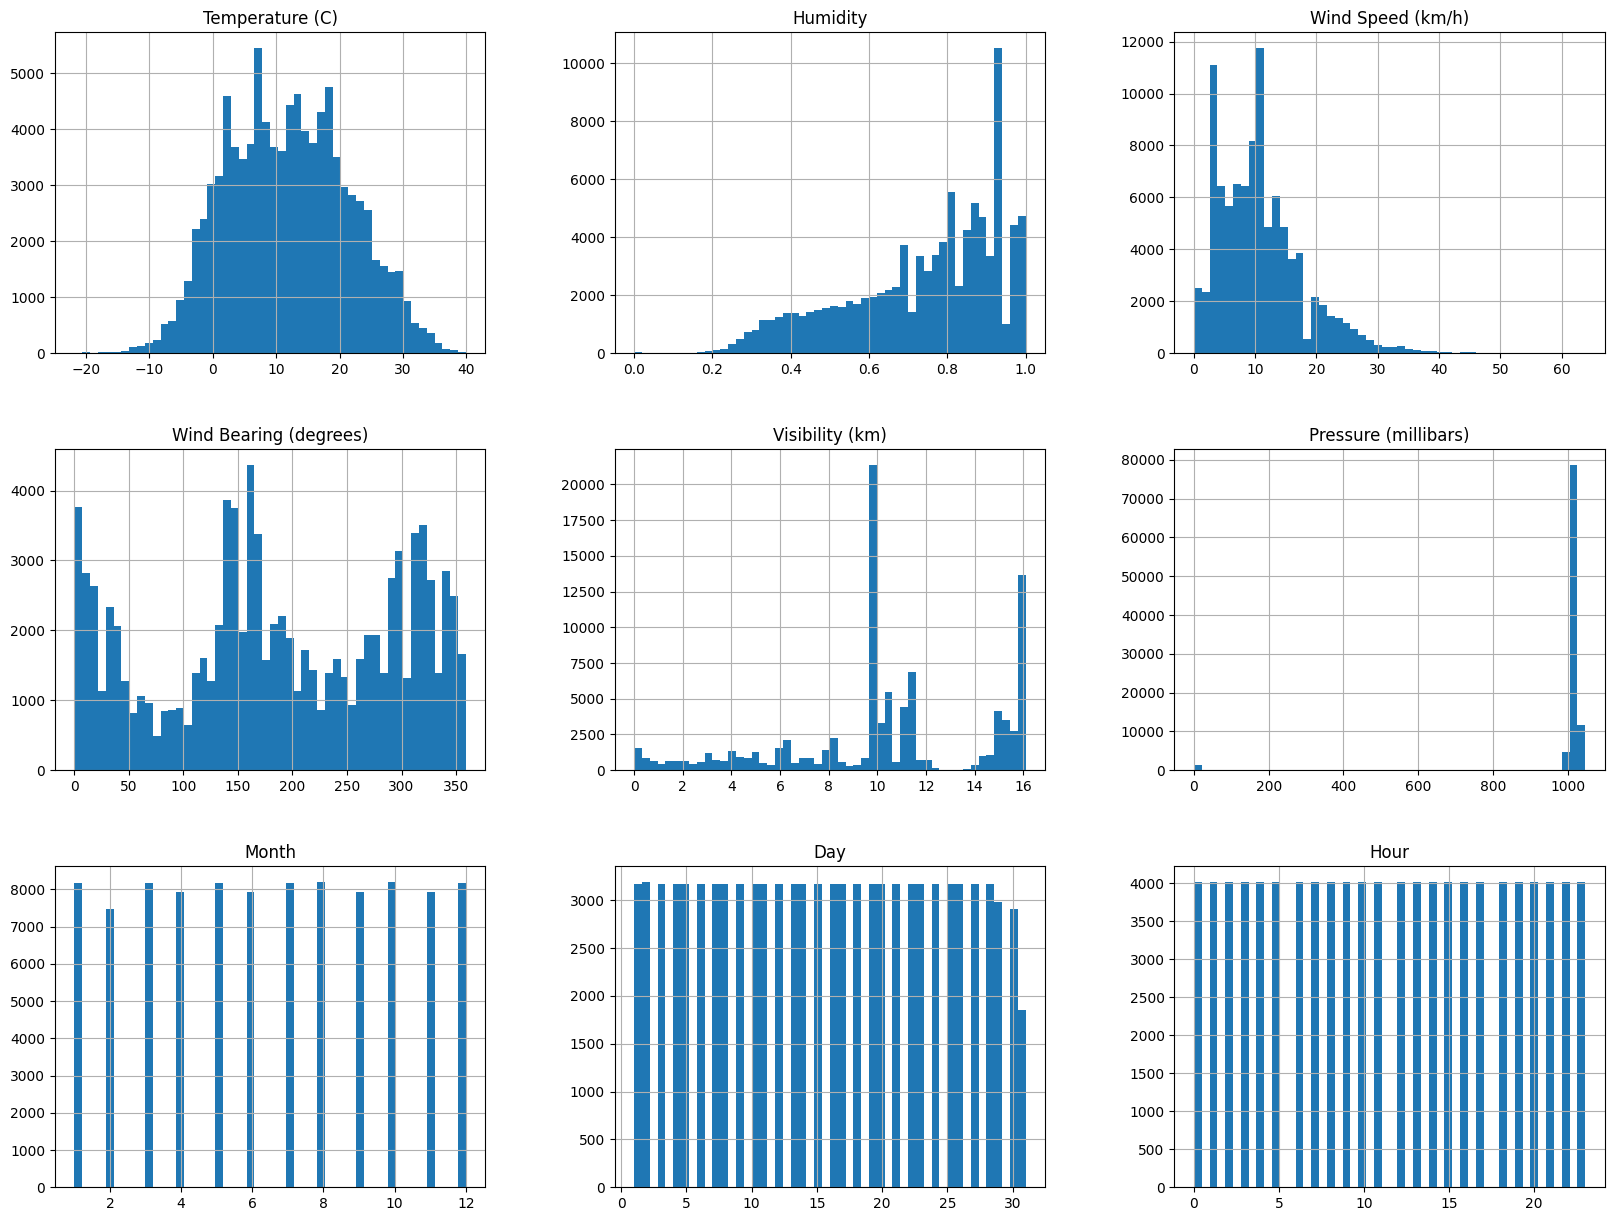

In [ ]:
weather_history_df.hist(bins=50, figsize=(20,15))
plt.show()

# Create a test set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(weather_history_df, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour
87206,2015-09-19 17:00:00,Mostly Cloudy,rain,28.122222,28.827778,0.53,13.3469,304.0,15.5526,0.0,1014.03,Partly cloudy throughout the day.,2015-09-19 17:00:00,9,19,17
33421,2009-11-29 14:00:00,Mostly Cloudy,rain,10.000000,7.988889,0.83,14.4900,150.0,9.9820,0.0,1017.90,Foggy starting overnight continuing until morn...,2009-11-29 14:00:00,11,29,14
6807,2006-11-18 16:00:00,Mostly Cloudy,rain,14.400000,14.400000,0.65,11.0446,144.0,9.6278,0.0,1022.00,Partly cloudy starting in the morning.,2006-11-18 16:00:00,11,18,16
37340,2010-02-10 20:00:00,Overcast,rain,1.016667,-2.722222,0.85,12.8156,40.0,8.0500,0.0,999.83,Foggy overnight.,2010-02-10 20:00:00,2,10,20
3016,2006-01-14 16:00:00,Mostly Cloudy,snow,-0.122222,-2.672222,0.82,7.4221,98.0,7.5509,0.0,1037.03,Mostly cloudy starting overnight continuing un...,2006-01-14 16:00:00,1,14,16


# Discover and Visualize the Data to Gain Insights

In [ ]:
weather = train_set

## Looking for Correlations

In [ ]:
corr_matrix = weather.corr()
corr_matrix["Temperature (C)"].sort_values(ascending=False)

<ipython-input-16-92e27652ca43>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = weather.corr()


Temperature (C)           1.000000
Visibility (km)           0.392092
Hour                      0.168853
Month                     0.151744
Wind Bearing (degrees)    0.027122
Wind Speed (km/h)         0.008297
Day                      -0.001742
Pressure (millibars)     -0.005124
Humidity                 -0.633043
Name: Temperature (C), dtype: float64

array([[<Axes: xlabel='Temperature (C)', ylabel='Temperature (C)'>,
        <Axes: xlabel='Humidity', ylabel='Temperature (C)'>,
        <Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>],
       [<Axes: xlabel='Temperature (C)', ylabel='Humidity'>,
        <Axes: xlabel='Humidity', ylabel='Humidity'>,
        <Axes: xlabel='Visibility (km)', ylabel='Humidity'>],
       [<Axes: xlabel='Temperature (C)', ylabel='Visibility (km)'>,
        <Axes: xlabel='Humidity', ylabel='Visibility (km)'>,
        <Axes: xlabel='Visibility (km)', ylabel='Visibility (km)'>]],
      dtype=object)

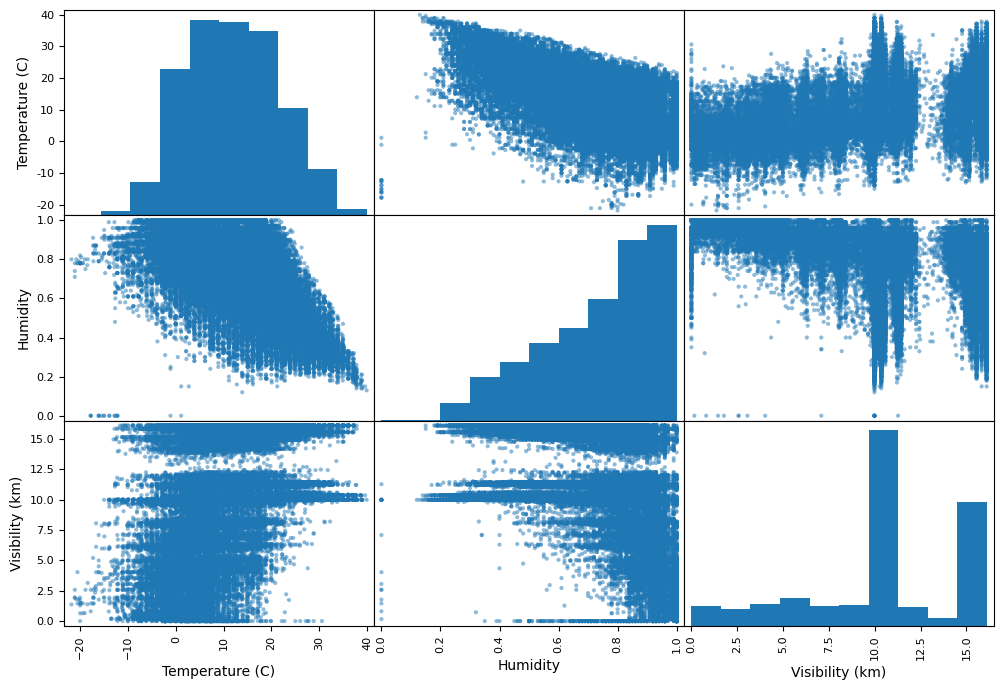

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Temperature (C)", "Humidity", "Visibility (km)"]
scatter_matrix(weather[attributes], figsize=(12, 8))

# Prepare the Data for Machine Learning Algorithms

In [ ]:
weather = train_set.drop("Temperature (C)", axis=1) # drop labels for training set
weather_labels = train_set["Temperature (C)"].copy()

## Data cleaning

## Precip Type

In [ ]:
sample_incomplete_rows = weather[weather.isnull().any(axis=1)]
sample_incomplete_rows.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour
95588,2016-10-31 23:00:00,Mostly Cloudy,NaN,4.588889,0.91,8.4686,299.0,0.0000,0.0,1021.80,Mostly cloudy starting in the afternoon.,2016-10-31 23:00:00,10,31,23
52750,2012-04-14 22:00:00,Overcast,NaN,11.738889,0.94,6.8747,15.0,4.0250,0.0,994.83,Light rain until morning.,2012-04-14 22:00:00,4,14,22
95339,2016-10-22 15:00:00,Clear,NaN,14.000000,0.56,8.0983,298.0,10.2557,0.0,1017.87,Rain until morning.,2016-10-22 15:00:00,10,22,15
59039,2012-05-31 00:00:00,Partly Cloudy,NaN,14.905556,0.77,11.2217,282.0,16.1000,0.0,1015.53,Partly cloudy starting in the morning.,2012-05-31 00:00:00,5,31,0
95363,2016-10-23 15:00:00,Partly Cloudy,NaN,13.533333,0.72,7.6958,148.0,9.9981,0.0,1020.93,Foggy starting overnight continuing until morn...,2016-10-23 15:00:00,10,23,15


In [ ]:
weather["Precip Type"].fillna("no", inplace=True)
sample_incomplete_rows = weather[weather.isnull().any(axis=1)]
sample_incomplete_rows.head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour


In [ ]:
weather["Precip Type"].value_counts()

rain    68233
snow     8522
no        407
Name: Precip Type, dtype: int64

## Pressure (millibars)

In [ ]:
weather[weather["Pressure (millibars)"] < 1].head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour
64209,2013-02-07 09:00:00,Mostly Cloudy,rain,-2.583333,0.85,20.7690,240.0,11.0446,0.0,0.0,Mostly cloudy throughout the day.,2013-02-07 09:00:00,2,7,9
41550,2010-05-05 07:00:00,Clear,rain,18.838889,0.66,14.3129,131.0,9.9820,0.0,0.0,Mostly cloudy starting in the afternoon contin...,2010-05-05 07:00:00,5,5,7
8248,2006-09-16 16:00:00,Clear,rain,26.011111,0.42,21.1393,89.0,9.9820,0.0,0.0,Mostly cloudy starting in the morning continui...,2006-09-16 16:00:00,9,16,16
5547,2006-03-27 04:00:00,Clear,rain,5.816667,0.86,7.8729,213.0,9.9015,0.0,0.0,Partly cloudy starting in the morning.,2006-03-27 04:00:00,3,27,4
57351,2012-06-22 15:00:00,Partly Cloudy,rain,29.611111,0.51,11.3344,322.0,11.2700,0.0,0.0,Partly cloudy starting in the morning continui...,2012-06-22 15:00:00,6,22,15


In [ ]:
weather[weather["Pressure (millibars)"] < 1].shape[0]

1053

In [ ]:
weather = weather[weather["Pressure (millibars)"] > 1]

In [ ]:
weather[weather["Pressure (millibars)"] < 900].head()

,Formatted Date,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month,Day,Hour


## Transformation pipeline

In [ ]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'Date', 'Month', 'Day', 'Hour'],
      dtype='object')

In [ ]:
weather_history_df["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

num_attribs = ["Humidity", "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)", "Pressure (millibars)"]
cat_attribs = ["Summary", "Precip Type"]
categories = [weather_history_df["Summary"].unique(), ["rain", "snow", "no"]]
ord_attribs = ["Month", "Day", "Hour"]
num_attribs = num_attribs + ord_attribs

full_pipeline = ColumnTransformer([
        ('std_scaler', StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(categories = categories, sparse_output=False), cat_attribs)
    ])

weather_prepared = full_pipeline.fit_transform(weather)
        #("precip_imputer", SimpleImputer(strategy="constant", fill_value = "no"), ["Precip Type"]),
        #         ("pressure_imputer", SimpleImputer(missing_values = 0, strategy="median"), ["Pressure (millibars)"])

In [ ]:
weather_prepared_df = pd.DataFrame(weather_prepared)
weather_prepared_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.152199,0.011309,-1.748323,-1.256783,-0.234709,0.726478,0.261327,-1.514482,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.331337,3.290462,1.066193,0.240417,-0.865253,-1.018183,0.715824,0.652150,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.203355,-0.732681,0.693410,1.025582,-0.843377,-0.145853,-0.420418,-0.358945,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.382493,-1.096513,1.140750,-0.098281,0.215680,-0.436629,-0.988540,1.374361,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.129071,0.466099,1.047554,-0.098281,0.011075,-0.727406,-1.556661,1.229919,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Prepare data function

In [ ]:
def prepare_weather_data(weather_data):
    weather_data["Precip Type"].fillna("no", inplace=True)
    weather_data = weather_data[weather_data["Pressure (millibars)"] > 1]
    weather_attrib = weather_data.drop("Temperature (C)", axis=1)
    weather_labels = weather_data["Temperature (C)"].copy()
    weather_attrib = full_pipeline.fit_transform(weather_attrib)
    return weather_attrib, weather_labels

## Data preparation

In [ ]:
weather_prepared, weather_labels = prepare_weather_data(train_set)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
from sklearn.model_selection import cross_val_score

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
#lin_reg.fit(weather_prepared, weather_labels)

In [ ]:
lin_scores = cross_val_score(lin_reg, weather_prepared, weather_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.47876842 5.44328431 5.48498057 5.36671257 5.48669472 5.39150678
 5.42742217 5.44019285 5.38665101 5.39951701]
Mean: 5.430573041700641
Standard deviation: 0.04146638990199002


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
#tree_reg.fit(weather_prepared, weather_labels)

In [ ]:
tree_scores = cross_val_score(tree_reg, weather_prepared, weather_labels,
                             scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [3.06228457 2.95946618 3.0512763  2.98703158 2.9320709  3.01502785
 3.02806059 2.96678928 2.99248929 3.02029289]
Mean: 3.0014789439466227
Standard deviation: 0.039365827150920706


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
#forest_reg.fit(weather_prepared, weather_labels)

In [ ]:
forest_scores = cross_val_score(forest_reg, weather_prepared, weather_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.09040296 2.10742031 2.10781296 2.11348027 2.05933184 2.0732872
 2.08464267 2.06778278 2.04165196 2.09714281]
Mean: 2.0842955774117
Standard deviation: 0.022310450478792834


### Epsilon-Support Vector Regression.

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR()
#svm_reg.fit(weather_prepared, weather_labels)

In [ ]:
svn_scores = cross_val_score(svm_reg, weather_prepared, weather_labels,
                             scoring="neg_mean_squared_error", cv=5)
svm_rmse_scores = np.sqrt(-svn_scores)
display_scores(svm_rmse_scores)

Scores: [9.12393087 9.18314404 9.1637073  9.17792473 9.21046568]
Mean: 9.171834522737994
Standard deviation: 0.028348450986556018


# Fine-Tune

## Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=180, high=300),
        'max_features': randint(low=7, high=16),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(weather_prepared, weather_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bac44625630>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bac44626200>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.2352831374575413 {'max_features': 13, 'n_estimators': 231}
2.2200305239739286 {'max_features': 14, 'n_estimators': 240}
2.288562201469328 {'max_features': 11, 'n_estimators': 282}
2.3551059409925448 {'max_features': 9, 'n_estimators': 266}
2.2174444423423716 {'max_features': 14, 'n_estimators': 296}


In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=14, n_estimators=296, random_state=42)

## Analyze the Best Model

In [ ]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([2.57171946e-01, 1.93139377e-02, 2.02227915e-02, 6.39010841e-02,
       5.86287706e-02, 2.85655040e-01, 2.35414391e-02, 2.72981908e-02,
       6.39759784e-03, 2.16007425e-03, 4.29833723e-03, 6.22413769e-03,
       1.49145931e-04, 1.69062758e-03, 1.19329419e-04, 1.56743967e-04,
       3.63218384e-05, 1.25227614e-05, 3.45823663e-07, 9.50149482e-06,
       7.34057198e-06, 8.77371450e-06, 7.95139704e-06, 1.24220393e-04,
       1.28349502e-05, 3.07377474e-08, 4.27426720e-05, 5.71802057e-07,
       1.26796709e-05, 9.27400449e-06, 5.31274798e-06, 8.94836193e-07,
       5.51279372e-06, 0.00000000e+00, 1.42086699e-06, 9.15537296e-02,
       1.29564861e-01, 1.65396270e-03])

In [ ]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2856550404492675, 'Month'),
 (0.25717194579791325, 'Humidity'),
 (0.06390108405765885, 'Visibility (km)'),
 (0.058628770600168065, 'Pressure (millibars)'),
 (0.027298190788093927, 'Hour'),
 (0.0235414391440669, 'Day'),
 (0.02022279151249096, 'Wind Bearing (degrees)'),
 (0.01931393772860558, 'Wind Speed (km/h)'),
 (0.006397597843964084, 'Partly Cloudy'),
 (0.006224137685788477, 'Foggy'),
 (0.00429833722784664, 'Overcast'),
 (0.00216007425187282, 'Mostly Cloudy'),
 (0.0016906275785454, 'Clear'),
 (0.00015674396748482567, 'Breezy and Overcast'),
 (0.00014914593073531173, 'Breezy and Mostly Cloudy'),
 (0.00012422039268387164, 'Dry and Partly Cloudy'),
 (0.00011932941885425551, 'Breezy and Partly Cloudy'),
 (4.27426720327345e-05, 'Dry'),
 (3.632183844587371e-05, 'Humid and Mostly Cloudy'),
 (1.283495020339954e-05, 'Windy and Mostly Cloudy'),
 (1.2679670879794236e-05, 'Humid and Overcast'),
 (1.2522761369728826e-05, 'Humid and Partly Cloudy'),
 (9.501494824720711e-06, 'Windy and Overcast

## Evaluate on the Test Set

In [ ]:
from sklearn.metrics import mean_squared_error

final_model = rnd_search.best_estimator_

X_test_prepared, y_test = prepare_weather_data(test_set)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

2.147283653017574

We can compute a 95% confidence interval for the test RMSE:

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2.12094959, 2.17329865])

In [ ]:
final_predictions

array([22.8520458 ,  8.6603979 , 11.52702703, ..., 14.27918544,
       26.4911036 , 21.39401276])

In [ ]:
y_test

87206    28.122222
33421    10.000000
6807     14.400000
37340     1.016667
3016     -0.122222
           ...    
94353     9.183333
56859    17.894444
9080     10.716667
47825    24.888889
43409    18.861111
Name: Temperature (C), Length: 19056, dtype: float64